In [ ]:
from IPython.display import clear_output
! pip install nltk gensim pyldavis spacy
clear_output()

# Тематическое моделирование

In [ ]:
! python -m spacy download ru_core_news_sm
clear_output()

In [ ]:
with open('Belanovskiy.txt', encoding='utf-8', mode='r') as file:
  text_a = file.read()
documents = text_a.split('______________')

In [ ]:
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.util import ngrams
import string
import spacy

# Загрузка необходимых ресурсов
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Задание русских стоп-слов (можно использовать русскоязычные стоп-слова)
stop_words = list(stopwords.words('russian'))

# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")

# Функция предобработки текста
def preprocess(text):
    # Перевод текста в пространство модели Spacy
    doc = nlp(text)
    # Лемматизация
    tokens = [token.lemma_ for token in doc]
    # Убираем знаки препинания и стоп-слова
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return tokens

# Применение предобработки ко всем текстам
processed_docs = [preprocess(doc) for doc in documents]

# Формируем биграммы
bigram = gensim.models.Phrases(processed_docs, min_count=1, threshold=2)
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Применяем биграммы
processed_docs_bigrams = [bigram_mod[doc] for doc in processed_docs]

# Создание словаря и корпуса
dictionary = corpora.Dictionary(processed_docs_bigrams)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs_bigrams]

# Применяем TF-IDF фильтрацию
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
corpus[0]

[(0, 7),
 (1, 7),
 (2, 1),
 (3, 1),
 (4, 4),
 (5, 2),
 (6, 3),
 (7, 3),
 (8, 8),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 5),
 (13, 1),
 (14, 3),
 (15, 2),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 3),
 (21, 2),
 (22, 2),
 (23, 1),
 (24, 3),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 2),
 (33, 4),
 (34, 2),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 7),
 (42, 3),
 (43, 3),
 (44, 1),
 (45, 6),
 (46, 7),
 (47, 3),
 (48, 1),
 (49, 5),
 (50, 6),
 (51, 1),
 (52, 1),
 (53, 2),
 (54, 1),
 (55, 3),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 3),
 (62, 1),
 (63, 3),
 (64, 1),
 (65, 2),
 (66, 2),
 (67, 2),
 (68, 2),
 (69, 1),
 (70, 3),
 (71, 1),
 (72, 3),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 4),
 (78, 1),
 (79, 2),
 (80, 5),
 (81, 2),
 (82, 1),
 (83, 1),
 (84, 2),
 (85, 1),
 (86, 1),
 (87, 6),
 (88, 4),
 (89, 1),
 (90, 3),
 (91, 1),
 (92, 1),
 (93, 2),
 (94, 2),
 (95, 2),
 (96, 3),
 (97, 4),
 (98, 5),
 (99, 2),
 (100, 2),

In [ ]:
corpus_tfidf[0]

[(0, 0.01370853975259508),
 (1, 0.012737275294194543),
 (2, 0.003747363151181691),
 (3, 0.005462930693217597),
 (4, 0.027042829758707126),
 (5, 0.007494726302363382),
 (6, 0.01638879207965279),
 (7, 0.020282122319030347),
 (8, 0.04370344554574078),
 (9, 0.004165153946758415),
 (10, 0.0067607074396767814),
 (11, 0.005462930693217597),
 (12, 0.017030016078859424),
 (13, 0.004703779962231068),
 (14, 0.012495461840275246),
 (15, 0.013521414879353563),
 (16, 0.004703779962231068),
 (17, 0.004703779962231068),
 (18, 0.013521414879353563),
 (19, 0.009407559924462136),
 (20, 0.012495461840275246),
 (21, 0.013521414879353563),
 (22, 0.013521414879353563),
 (23, 0.0067607074396767814),
 (24, 0.0054588322689405186),
 (25, 0.00623477500554538),
 (26, 0.005462930693217597),
 (27, 0.0067607074396767814),
 (28, 0.0034060032157718846),
 (29, 0.00311738750277269),
 (30, 0.005462930693217597),
 (31, 0.00833030789351683),
 (32, 0.013521414879353563),
 (33, 0.027042829758707126),
 (34, 0.00529370496957071

Стоп, а что такое модель Spacy? Это модель для синтаксического анализа. До этого мы работали с анализом морфологии, а теперь посмотрим на синтаксис. Spacy умеет вот так:

In [ ]:
text = "Бесцветные зелёные идеи спят яростно."

doc = nlp(text)

from spacy import displacy

displacy.render(doc, style='dep',jupyter=True)

In [ ]:
for token in doc:
    print(token.text, token.dep_, token.head.text) # слово, его синтаксическая роль, его вершина

Бесцветные amod идеи
зелёные amod идеи
идеи nsubj спят
спят ROOT спят
яростно advmod спят
. punct спят


А ещё с помощью Spacy можно легко лемматизировать слова, что мы и сделали.

In [ ]:
tokens = [token.lemma_ for token in doc]
tokens

['бесцветный', 'зелёный', 'идея', 'спать', 'яростно', '.']

Ещё один вопрос: а что за TF-IDF? Это метрика, используемая для оценки важности слов в тексте. Для работы LDA-модели нужны **словарь** (список всех слов во всех исследуемых текстах) и **корпус** (статистика важности слов). Обычно в качестве корпуса используется просто "мешок слов" – список слов с количеством вхождений для каждого (чем слово чаще встречается, тем оно "важнее" для данного набора текстов). TF-IDF предоставляет более сложную оценку значимости слов. Подробнее про разницу между "мешком слов" и TF-IDF можно почитать [здесь](https://colab.research.google.com/drive/1P4d45uI5Yk0ctxzNNIYrsL_1RIOa_Sh8#scrollTo=BvfxWVkeweJb).

Теперь перейдём непосредственно к LDA-модели. Она делит датасет текстов на интерпретируемые темы (для каждой темы выделяются ключевые слова, по ним можно определить тему).

In [ ]:
# Создание LDA модели
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=8, workers=2)

# Просмотр топиков
for idx, topic in lda_model.print_topics(-1):
    print(f"Тема {idx}: {topic}")

Тема 0: 0.000*"количество_сырьё" + 0.000*"корректировка" + 0.000*"сырьё" + 0.000*"сырьё_поэтому" + 0.000*"причина_сокращать" + 0.000*"разряд" + 0.000*"баланс" + 0.000*"доработка_баланс" + 0.000*"термист" + 0.000*"предприятие"
Тема 1: 0.000*"станок" + 0.000*"кислород" + 0.000*"кольцо" + 0.000*"наладчик" + 0.000*"мотор" + 0.000*"спирт" + 0.000*"циркулярка" + 0.000*"лицензия" + 0.000*"экспертиза" + 0.000*"цех"
Тема 2: 0.001*"начальник_участок" + 0.000*"шахта" + 0.000*"горный_мастер" + 0.000*"участок" + 0.000*"начальник_смена" + 0.000*"цех" + 0.000*"судно" + 0.000*"работник_столовая" + 0.000*"баланс" + 0.000*"бригада"
Тема 3: 0.000*"подрядчик" + 0.000*"строительно_монтажный" + 0.000*"строительный_организация" + 0.000*"монтажный_работа" + 0.000*"местный_орган" + 0.000*"увеличение_стоимость" + 0.000*"строительство" + 0.000*"промышленный_строительство" + 0.000*"инфраструктура" + 0.000*"стройка"
Тема 4: 0.000*"мел" + 0.000*"предприятие" + 0.000*"судно" + 0.000*"вагон" + 0.000*"впо" + 0.000*"це

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds="mmds", R=10)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.001459  0.002170       1        1  58.490118
2      0.001096 -0.001599       2        1  35.561828
1      0.000333  0.000303       3        1   3.138783
7     -0.000361 -0.000546       4        1   1.322720
5     -0.000133 -0.000077       5        1   1.058410
6      0.000111  0.000011       6        1   0.196662
9      0.000235 -0.000069       7        1   0.175764
3      0.000042 -0.000075       8        1   0.042697
0      0.000070 -0.000057       9        1   0.006509
4      0.000064 -0.000062      10        1   0.006509, topic_info=                    Term       Freq      Total Category  logprob  loglift
4112         предприятие  55.000000  55.000000  Default  10.0000  10.0000
8863   начальник_участок  33.000000  33.000000  Default   9.0000   9.0000
2394        министерство  36.000000  36.000000  Default   8.0000   8.0000
22388           комплект  25.000000  25.000000  Default   7.0000   7.0000
583             водитель  24.000000  24.000000  Default   6.0000   6.0000
...                  ...        ...        ...      ...      ...      ...
6021                 цех   0.000353  15.951494  Topic10 -10.2529  -1.0788
22104          спецвагон   0.000353   8.883596  Topic10 -10.2532  -0.4937
2194                 лес   0.000353  12.839796  Topic10 -10.2533  -0.8622
2199        лесоматериал   0.000353   8.486259  Topic10 -10.2536  -0.4484
351             бригадир   0.000353   9.326484  Topic10 -10.2543  -0.5435

[204 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
21396      1  0.545666            22_тысяча
21396      2  0.363777            22_тысяча
17355      1  0.567980                 3000
17355      2  0.378653                 3000
21403      1  0.566121               5_кокс
...      ...       ...                  ...
17014      2  0.376027  электрооборудование
14511      1  0.574753            эстетичен
14511      2  0.383169            эстетичен
6174       1  0.575336                  это
6174       2  0.383558                  это

[362 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 2, 8, 6, 7, 10, 4, 1, 5])

## **Подсчет частот слов. Визуализация**


In [ ]:
from collections import Counter
import plotly.express as px


# Подсчитываем частоту слов
word_counts = Counter([word for text in processed_docs for word in text])

# Получаем 10 самых популярных слов
word_data = word_counts.most_common(10)

# Визуализируем частоту слов
fig_word = px.bar(x=[item[0] for item in word_data], y=[item[1] for item in word_data],
                  title="Самые распространенные слова", labels={"x": "Слово", "y": "Частота"})

# Отображаем графики
fig_word.show()


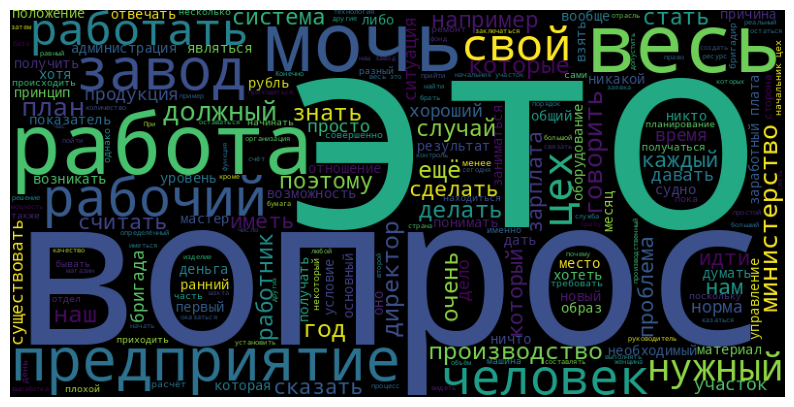

In [ ]:
text_data = ' '.join([word for text in processed_docs for word in text])
wordcloud = WordCloud(width=800,
                      height=400).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()